Import the necessary packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data in a DataFrame and show the first 5 rows to inspect the DataFrame.

In [2]:
filepath = "customer_booking.csv"
data = pd.read_csv(filepath)
data.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


**Information about the dataframe**
  
  
This dataset contains information about airline bookings, including the number of passengers, sales channel, trip type, purchase lead time, length of stay, flight hour, flight day, route, booking origin, and various flags indicating if the customer wanted extra baggage, preferred seat, or in-flight meals. The dataset also includes the total flight duration and a flag indicating if the booking was completed. This information can be used for various analyses, such as predicting demand, identifying popular routes, and understanding customer preferences.

**Column Description**:
* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking

Create a new dataframe from this one:
* only containing following columns:  
num_passengers, purchase_lead, length_of_stay, booking_origin, flight_duration and booking_complete
* with only the rows where the booking is completed (1)


Group the average days between booking date and traveling date per country of the booking. Display the countries with the lowest average of days between booking and traveling first and the ones with the most days last.

In [3]:
df = pd.DataFrame(data)
kolommen = ["num_passengers", "purchase_lead", "length_of_stay", "booking_origin", "flight_duration", "booking_complete"]
#df_enkel_kolommen = df[kolommen]
#df_enkel_kolommen
df_filter = df[df["booking_complete"] == 1][kolommen]
df_filter

,num_passengers,purchase_lead,length_of_stay,booking_origin,flight_duration,booking_complete
82,1,15,31,Malaysia,8.83,1
86,1,156,19,Malaysia,8.83,1
94,1,181,87,Singapore,8.83,1
109,1,127,17,Malaysia,8.83,1
122,1,42,17,Malaysia,8.83,1
...,...,...,...,...,...,...
49972,1,33,6,Taiwan,4.67,1
49977,2,15,6,Malaysia,4.67,1
49980,4,242,6,Malaysia,5.00,1
49984,2,7,6,Australia,5.62,1


In [4]:
avg_days_between_booking_travelling = df.groupby("booking_origin")["purchase_lead"].mean().sort_values(ascending = True)
avg_days_between_booking_travelling

booking_origin
Tanzania        10.000000
Vanuatu         11.000000
Israel          12.000000
Kenya           12.666667
Belarus         15.000000
                  ...    
Nicaragua      168.000000
Cyprus         172.500000
Afghanistan    191.000000
Bhutan         269.000000
Malta          291.000000
Name: purchase_lead, Length: 104, dtype: float64

Make a histogram (bar plot) of the purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.

C:\Users\dagten.BWZ\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


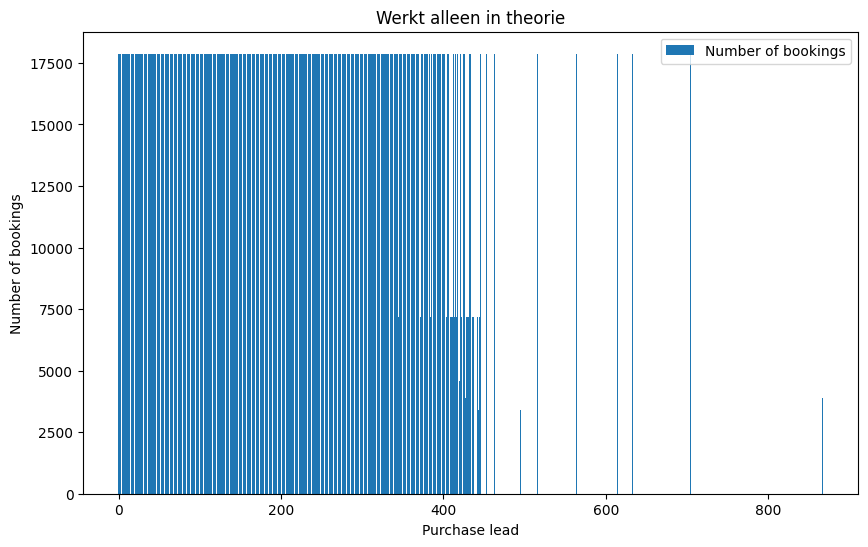

In [25]:
top_countries = df["booking_origin"].value_counts().head(5).index
number_bookings = df["booking_origin"].value_counts()
df_top_countries = df[df["booking_origin"].isin(top_countries)]
plt.figure(figsize=(10,6))
plt.bar(df_top_countries["purchase_lead"], df_top_countries["booking_origin"].map(number_bookings), label="Number of bookings")
plt.xlabel("Purchase lead")
plt.ylabel("Number of bookings")
plt.legend()
plt.title("Werkt alleen in theorie")
plt.show()